# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# DFT in der Anwenung

In diesem Notebook werden wir die DFT zwar nicht selbst implementieren, uns aber deren physikalische Interpretation ansehen.

<p><div style="background-color:lightyellow;border-style:groove">
    
**Aufgabe 1:**

Konstruiert zunächst ein fünf Sekunden langes Signal mit zwei Sinus-Tönen mit den Frequenzen 2 Hz und 5 Hz durch Additive Synthese (nicht vergessen: die einzelnen Sinustöne mit 0.5 multiplizieren, damit das Signal in der Range ($-1$ - $1$) bleibt) mit der Sampling Rate 1000 Hz und speichert es unter der Variable `x`.

</div></p>

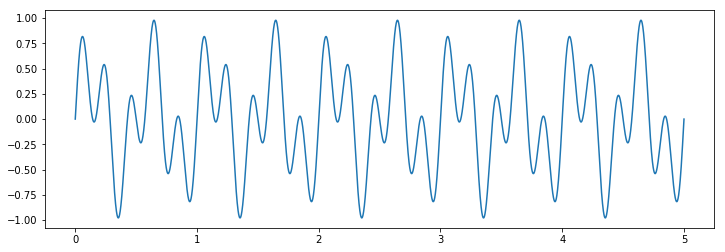

In [2]:
sr = 1000
length = 5
t = np.linspace(0, length, int(sr * length))
freq1, freq2 = 2, 5
x = np.sin(freq1 * t * 2 * np.pi) * 0.5 + np.sin(freq2 * t * 2 * np.pi) * 0.5

plt.figure(figsize=(12, 4))
plt.plot(t, x)
plt.show()

<p><div style="background-color:lightyellow;border-style:groove">
    
**Aufgabe 2:**

Führt mit der Funktion `np.fft.fft` die DFT durch und speichert sie unter der Variable `dft`.

</div></p>

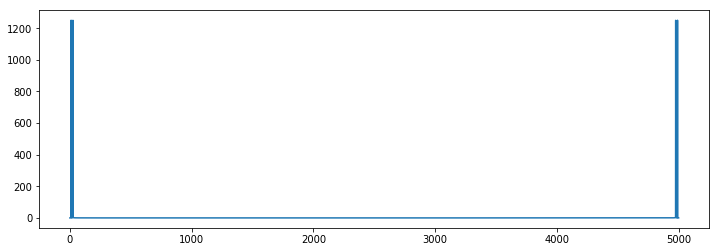

In [3]:
dft = np.fft.fft(x)

plt.figure(figsize=(12, 4))
plt.plot(np.abs(dft))
plt.show()

Wir können beobachten, dass der geplottete Graph symmetrisch zu sein scheint.

Gleichzeitig sehen wir auf der x-Achse die Frequenz-Indizes ($k$) von 0 - 5000. Diese sind nicht mit der Frequenz in Hertz zu verwechseln!!

Wir möchten nun auf der x-Achse die entsprechenden (physikalischen) Frequenzen plotten. Hierfür verwenden wir die Formel:

$f = \frac{k \cdot sr}{N}$

<p><div style="background-color:lightyellow;border-style:groove">
    
**Aufgabe 3:**

Erstellt einen Array `f` mit den zu den jeweiligen $k$ gehörenden Frequenzen in Hertz mit der oben stehenden Formel.

Limitiert die Anzeige des Plots auf die Frequenzen von 0 bis 7 Hz mit der Funktion `plt.xlim`.

</div></p>

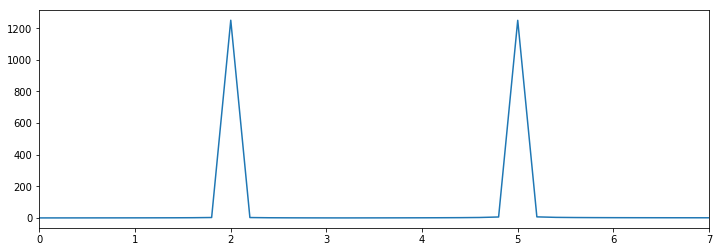

In [4]:
N = np.shape(x)[0]
k = np.arange(N)
f = k * sr / N

plt.figure(figsize=(12, 4))
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()

Nun wollen wir noch ein zweites (ähnliches) Signal analysieren. Anstatt zwei gleichzeitiger Töne schreiben wir stattdessen zwei aufeinanderfolgende Töne mit den Frequenzen 2 und 5 Hz in unser Signal `x`:

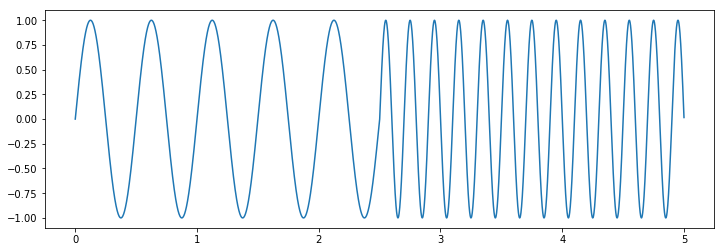

In [5]:
sr = 1000
length = 5
t = np.linspace(0, length, int(sr * length))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t[:int(length * sr / 2)] * 2 * np.pi),
                    np.sin(freq2 * t[:int(length * sr / 2)] * 2 * np.pi)))

plt.figure(figsize=(12, 4))
plt.plot(t, x)
plt.show()

<p><div style="background-color:lightyellow;border-style:groove">
    
**Aufgabe 4:**

Führt nun mit diesem Signal erneut die DFT durch und plottet sie zusammen mit den physikalischen Frequenzen und limitiert den Plot auf 0 bis 7 Hz (wie in den Aufgaben 1-3).

</div></p>

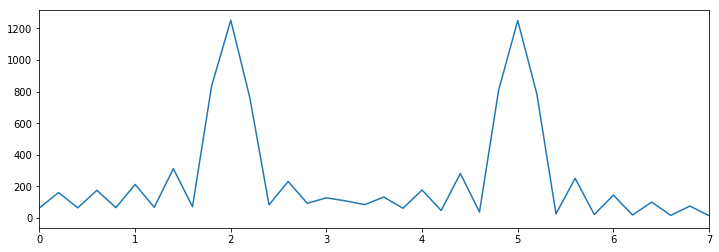

In [6]:
dft = np.fft.fft(x)

N = np.shape(x)[0]
k = np.arange(N)
f = k * sr / N

plt.figure(figsize=(12, 4))
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()